# MQB7046 MODELLING PUBLIC HEALTH DATA - Linear regression

##### Prepared by Claire Choo (for April's fool, 1/4/2024)


Multiple linear regression is a statistical technique used to model the relationship between multiple independent variables (predictors) and a single dependent variable. It extends the concept of simple linear regression, where there is only one independent variable.

It is important to ensure that the assumptions of multiple linear regression, such as linearity, independence of errors, constant variance (homoscedasticity), and normality of residuals, are met for the validity of the model.

Steps involved in conducting multiple linear regression:
1) Import Libraries
2) Prepare the data
3) Add Constant (Intercept): Add a constant term to the independent variables
4) Fit the Model: 
Use the OLS (Ordinary Least Squares) method
5) View the summary of the regression results, which includes coefficients, standard errors, t-values, p-values, R-squared, and other statistics
6) 
Interpret the result:  coefficients (slopes) of the independent variables, their significance (p-values), and the overall goodness of fit (R-squared
7) Assess Assumptions:  use diagnostic plots and statistical tests provided by Statsmodel.. 

#### Practical 3

The researchers are interested to examine if upper body strength and lower body strengths of an older person are associated with the number and severity of falls. The injury index was calculated to indicate number and severity of accidents that an older person suffered.

Variable / Definition
1) injury : Overall injury index based on medical records
2) gluts  : A measure of strength of the lower body
3) arms   : A measure of strength of the upper body
4) age    : Age of participants (in years)
5) gender : Gender of participants (0: Male, 1: Female)




In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf # or import statsmodels.api as sm 

In [2]:
# Load data into a DataFrame 

injuries = pd.read_csv("C:\\Users\\USER\\MPHD notebooks\\injuries.csv")


### Data Preparation and exploration

Use pandas functions to explore the structure of the dataset, check for missing values, outliers, and data errors; and understand the distribution of variables. Check for correct format for analysis.

In [3]:
# check dataframe

print(injuries)

     id  age  gender  gluts  arms  injury
0     1   60       0     27    11     159
1     2   65       0     26    36     238
2     3   65       0     27    28     195
3     4   64       0     27    24     212
4     5   67       0     34    25     199
..  ...  ...     ...    ...   ...     ...
95   96   70       1     31    30     161
96   97   69       1     33    28     184
97   98   63       1     28    38     131
98   99   73       1     25     9     207
99  100   75       1     36    42     191

[100 rows x 6 columns]


In [4]:
# Display basic information about the dataset

print(injuries.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      100 non-null    int64
 1   age     100 non-null    int64
 2   gender  100 non-null    int64
 3   gluts   100 non-null    int64
 4   arms    100 non-null    int64
 5   injury  100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB
None


In [5]:
# check data shape

injuries.shape

(100, 6)

In [6]:
# Check missing data

missing_data = injuries.isnull().sum()
print(missing_data)

id        0
age       0
gender    0
gluts     0
arms      0
injury    0
dtype: int64


In [7]:
# Select variables to analyse

selected_variables = ['age', 'gender', 'gluts', 'arms', 'injury'] # drop id
data = injuries[selected_variables]


In [8]:
# Display descriptive statistics
print(data.describe().round(2))

          age  gender   gluts    arms  injury
count  100.00  100.00  100.00  100.00  100.00
mean    67.09    0.49   31.08   30.40  145.80
std      3.62    0.50    5.78    8.54   52.20
min     60.00    0.00   15.00    5.00    6.00
25%     64.75    0.00   27.00   24.75  112.25
50%     67.00    0.00   31.00   30.00  148.00
75%     70.00    1.00   34.25   36.25  184.50
max     75.00    1.00   47.00   48.00  279.00


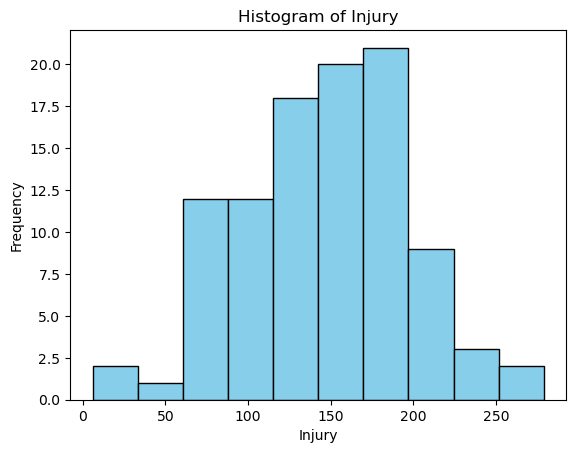

In [9]:
# Check data distribution

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data['injury'], bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Injury')
plt.ylabel('Frequency')
plt.title('Histogram of Injury')

# Display histogram
plt.show()



In [10]:
# check for skewness and kurtosis

from scipy.stats import skew, kurtosis, shapiro
import pandas as pd

# Calculate skewness and kurtosis
skewness = pd.DataFrame({'Skewness': [skew(data['age']), skew(data['arms']), skew(data['gluts']), skew(data['injury'])]},
                        index=['age', 'arms', 'gluts', 'injury'])
kurtosis = pd.DataFrame({'Kurtosis': [kurtosis(data['age']), kurtosis(data['arms']), kurtosis(data['gluts']), kurtosis(data['injury'])]},
                        index=['age', 'arms', 'gluts', 'injury'])

print("Skewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Skewness:
        Skewness
age     0.034723
arms   -0.369631
gluts  -0.015470
injury -0.099198

Kurtosis:
        Kurtosis
age    -0.657302
arms    0.065117
gluts   0.130505
injury -0.037121


In [11]:
# check for normality # perform Shapiro-Wilk test for normality

from scipy.stats import skew, kurtosis, shapiro
import pandas as pd

shapiro_test = pd.DataFrame({'Shapiro-Wilk p-value': [shapiro(data['age'])[1], shapiro(data['arms'])[1], shapiro(data['gluts'])[1], shapiro(data['injury'])[1]]},
                            index=['age', 'arms', 'gluts', 'injury'])


print("\nShapiro-Wilk Test (p-values):")
print(shapiro_test)





Shapiro-Wilk Test (p-values):
        Shapiro-Wilk p-value
age                 0.174147
arms                0.256613
gluts               0.911418
injury              0.852872


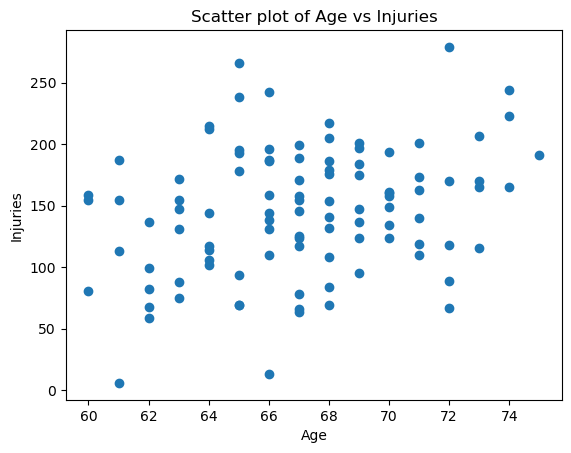

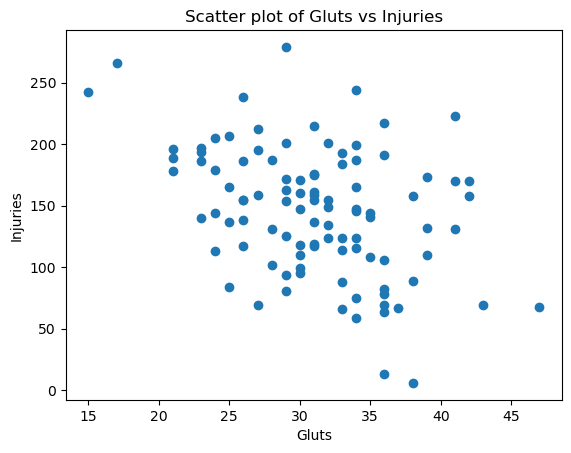

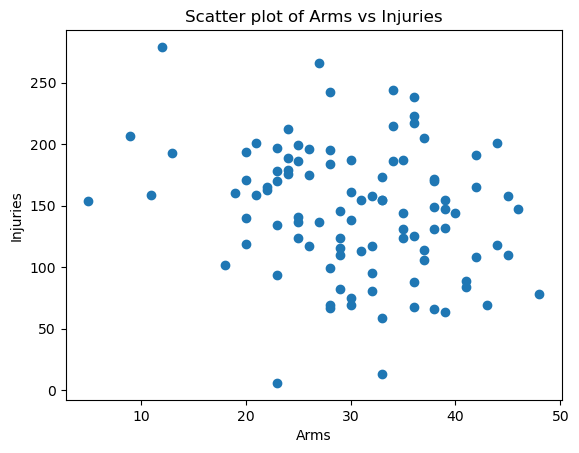

In [12]:
# Data visualisation using scatterplot
# check for possible linear relationship

import matplotlib.pyplot as plt

# Scatter plot for 'age' vs 'injuries'
plt.scatter(data['age'], data['injury'])
plt.title('Scatter plot of Age vs Injuries')
plt.title('Scatter plot of Age vs Injuries')
plt.xlabel('Age')
plt.ylabel('Injuries')
plt.show()

# Scatter plot for 'gluts' vs 'injuries'
plt.scatter(data['gluts'], data['injury'])
plt.title('Scatter plot of Gluts vs Injuries')
plt.xlabel('Gluts')
plt.ylabel('Injuries')
plt.show()

# Scatter plot for 'arms' vs 'injuries'
plt.scatter(data['arms'], data['injury'])
plt.title('Scatter plot of Arms vs Injuries')
plt.xlabel('Arms')
plt.ylabel('Injuries')
plt.show()


### Correlation analysis

In [13]:
# Correlation analysis for quantitative data

from scipy.stats import pearsonr

# Select columns for correlation analysis, excluding 'gender'
correlation_var = data.drop(columns='gender').columns

# Initialize empty DataFrames to store correlation coefficients and p-values
correlation_matrix = pd.DataFrame(columns=correlation_var, index=correlation_var)
p_values_matrix = pd.DataFrame(columns=correlation_var, index=correlation_var)

# Compute correlation coefficients and p-values for each pair of variables
for i, column1 in enumerate(correlation_var):
    for j, column2 in enumerate(correlation_var):
        correlation_coefficient, p_value = pearsonr(data[column1], data[column2])
        # Assign rounded values to correlation matrix
        correlation_matrix.loc[column1, column2] = correlation_coefficient
        # Assign rounded values to p-values matrix
        p_values_matrix.loc[column1, column2] = p_value

# Print rounded correlation matrix and p-values matrix with fixed decimal places
print("Correlation Matrix:")
print(correlation_matrix.apply(lambda x: x.map("{:.3f}".format)))

print("P-Values Matrix:")
print(p_values_matrix.apply(lambda x: x.map("{:.3f}".format)))


Correlation Matrix:
           age   gluts    arms  injury
age      1.000   0.177  -0.002   0.282
gluts    0.177   1.000   0.338  -0.393
arms    -0.002   0.338   1.000  -0.243
injury   0.282  -0.393  -0.243   1.000
P-Values Matrix:
          age  gluts   arms injury
age     0.000  0.078  0.980  0.005
gluts   0.078  0.000  0.001  0.000
arms    0.980  0.001  0.000  0.015
injury  0.005  0.000  0.015  0.000


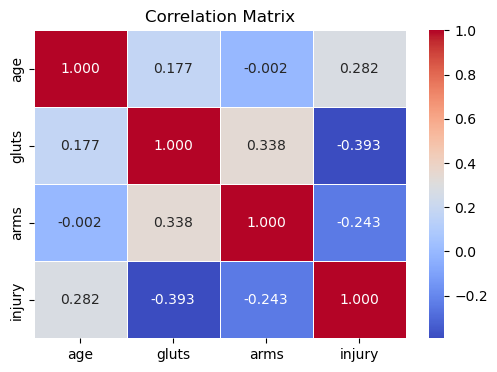

In [14]:
# Data visualisation using heat map

import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation analysis, excluding 'gender'
correlation_var = data.drop(columns='gender')

# Compute correlation matrix
correlation_matrix = correlation_var.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Draw heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".3f")
plt.title('Correlation Matrix')

plt.show()



### Independent t-test

In [15]:
from scipy.stats import ttest_ind

# Separate 'injury' values for each group defined by 'gender'
injury_male = data[data['gender'] == 0]['injury']
injury_female = data[data['gender'] == 1]['injury']

# Perform independent t-test
t_statistic, p_value = ttest_ind(injury_male, injury_female)

# Print results
print("T-Statistic:", t_statistic.round(3))
print("P-Value:", p_value.round(3))


T-Statistic: -0.576
P-Value: 0.566


### Multiple Linear Regression analysis

In [16]:
# Multiple linear regression (full model)

# Run multiple linear regression
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for multiple linear regression
formula = 'injury ~ age + gender + arms + gluts'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 injury   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     9.868
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.01e-06
Time:                        12:12:40   Log-Likelihood:                -519.52
No. Observations:                 100   AIC:                             1049.
Df Residuals:                      95   BIC:                             1062.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -62.6770     85.193     -0.736      0.4

##### Interpretation

R-squared: The R-squared value measures the proportion of the variance in the dependent variable (injury) that is predictable from the independent variables (age, gender, arms, and gluts). The R-squared is 0.294, approximately 29.4% of the variance in injury can be explained by the independent variables.

Adjusted R-squared: Adjusted R-squared takes into account the number of predictors in the model. It penalizes the addition of unnecessary predictors that do not improve the model significantly. The adjusted R-squared (0.264) is slightly lower than the R-squared value, suggesting that the model may not be improved by including additional predictors.

F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the model. The F-statistic is 9.868 with a very low p-value (1.01e-06), indicating that the overall model is statistically significant.

Coefficients: The coefficients represent the estimated effect of each independent variable on the dependent variable, holding other variables constant. The coefficients for arms and gluts represent the expected change in injury for a one-unit increase in these variables, holding other variables constant. For example:

 -  a) For every one unit increase in age, injury is expected to increase by approximately 5.1103 units.

 -  b) The coefficient for gender is 5.9006, but it's not statistically significant (p-value > 0.05), suggesting that gender may not have a significant effect on injury after controlling for other variables.


Intercept: The intercept represents the estimated value of the dependent variable when all independent variables are set to zero. In this case, it's -62.6770, but it's not statistically significant (p-value > 0.05).

Standard Errors, t-values, and P-values: These values are associated with each coefficient and provide information about the reliability and significance of the estimated coefficients.

Omnibus, Jarque-Bera (JB), Skew, Kurtosis: These are tests for normality of residuals. If the p-value < 0.05, suggests fail to reject the null hypothesis of normality, thus the residuals may not be normally distributed. In this case, both p-values are above 0.05, indicating that normality assumptions is not violated.

Durbin-Watson: This tests for the presence of autocorrelation in the residuals. A value around 2 suggests no autocorrelation. The result 2.033, indicating no significant autocorrelation.

Condition Number: This measures multicollinearity. A large condition number (1.52e+03) suggests possible multicollinearity among the independent variables, which may affect the stability of the coefficients.

Overall, this regression model suggests that age and the presence of gluts are statistically significant predictors of injury, while gender and the presence of arms may not have a significant effect on injury after controlling for other variables. However, there might be multicollinearity issue.

### Diagnostic test

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Extract independent variables
X = data[['age', 'gender', 'arms', 'gluts']]

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# VIF values greater than 10 indicate multicollinearity.

  Variable        VIF
0      age  34.269919
1   gender   1.983888
2     arms  15.424769
3    gluts  35.312475


In [18]:
# ReRun multiple linear regression # drop age (high VIF)

# Run multiple linear regression
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for multiple linear regression
formula = 'injury ~ gender + arms + gluts'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression model
print(model.summary())

# Output: R2 dropped significantly

                            OLS Regression Results                            
Dep. Variable:                 injury   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     6.667
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           0.000388
Time:                        12:12:40   Log-Likelihood:                -527.43
No. Observations:                 100   AIC:                             1063.
Df Residuals:                      96   BIC:                             1073.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    264.3765     28.264      9.354      0.0

In [19]:
# ReRun multiple linear regression # drop arms (include age)

# Run multiple linear regression
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for multiple linear regression
formula = 'injury ~ age + gender + gluts'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                 injury   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     12.68
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.73e-07
Time:                        12:12:40   Log-Likelihood:                -520.20
No. Observations:                 100   AIC:                             1048.
Df Residuals:                      96   BIC:                             1059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -78.1645     84.241     -0.928      0.3

In [20]:
# ReRun multiple linear regression (drop gender - redundant)

# Run multiple linear regression
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for multiple linear regression
formula = 'injury ~ age + gluts'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 injury   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     19.02
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           1.07e-07
Time:                        12:12:40   Log-Likelihood:                -520.35
No. Observations:                 100   AIC:                             1047.
Df Residuals:                      97   BIC:                             1055.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.6304     83.882     -0.914      0.3

### Test interaction

In [21]:
# Test interaction
# potential interaction 

# ReRun multiple linear regression with interaction term
import pandas as pd
import statsmodels.formula.api as smf

# Define the formula for multiple linear regression
formula = 'injury ~ age + gluts + age:gluts'

# Fit the regression model
model = smf.ols(formula=formula, data=data).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 injury   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     15.01
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.37e-08
Time:                        12:12:40   Log-Likelihood:                -517.66
No. Observations:                 100   AIC:                             1043.
Df Residuals:                      96   BIC:                             1054.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1003.7702    476.314      2.107      0.0

##### Interpretation

1. age:gluts - p-value for (age:gluts) is 0.023 suggests that the interaction effect between (age) and (gluts) is statistically significant, the effect of (age) on (injury) is modified by the presence of 'gluts', and the effect of (gluts) on (injury) is modified by the age of the individuals. For a one-unit increase in both age and gluts, the expected change in injury increases by 0.5022 units, on average.
2. Adjusted squared - The model explains 31.9% of the variance in (injury).
3. Other Coefficient - The coefficients for(age) and(gluts) represent their individual effects on (injury) without considering the interaction effect.
   - The coefficient for gluts is -37.7443. Holding age constant, for each one unit increase in gluts, the injury decreases by approximately 37.74 units. p-value= 0.011, gluts is statistically significant.
   - The coefficient for age is -10.9388. This suggests that,  for each one unit increase in age, the injury decreases by approximately 10.94 units, holding gluts constant. However, the p-value is 0.128, indicating that age is not statistically significant.
4. Overall, the presence of a significant interaction effect between age and gluts suggests that their combined influence injury is different from what would be expected based their individual effects. Age alone may not be statistically significant. 

####### Injury = 1003.77 − 10.94(Age) −37.74(Gluts) +  0.50(Age*Gluts)


Diagnostic tests:

Jarque-Bera (JB)= 0.126, p = 0.939 (p>0.05), fail to reject the null hypothesis of normality, thus residuals is normally distributed.

Durbin-Watson= 2.006 (close to 2) indicating no significant autocorrelation support the independence of errors assumption.


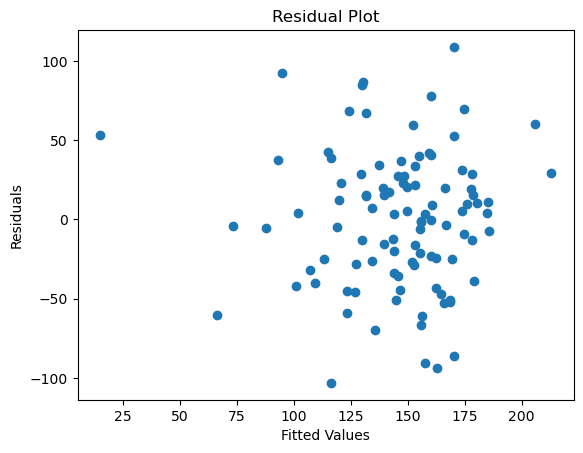

In [22]:
# check for homoscedasticity (constant variance)

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming model is the fitted regression model
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Interpretation: A random scatter of points around the horizontal axis (zero residual line) indicates that the assumption of homoscedasticity is likely met. The variance of the residuals is constant across different levels of the independent variable(s). No systematic pattern in the residuals, suggesting that the model's performance is consistent across the range of predicted values.

In [23]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming model is the fitted regression model
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(residuals, model.model.exog)
print("Lagrange Multiplier p-value:", round(lm_p_value, 3))
print("F-statistic p-value:", round(f_p_value, 3))



Lagrange Multiplier p-value: 0.773
F-statistic p-value: 0.781


Interpretation: both p-values (LM test p-value and F-statistic p-value) > 0.05, you fail to reject the null hypothesis of homoscedasticity. There is no significant evidence of heteroscedasticity in the model.